In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('water_potability.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
data.shape

(3276, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [6]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [7]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
data.duplicated().sum()

0

In [9]:
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<Axes: >

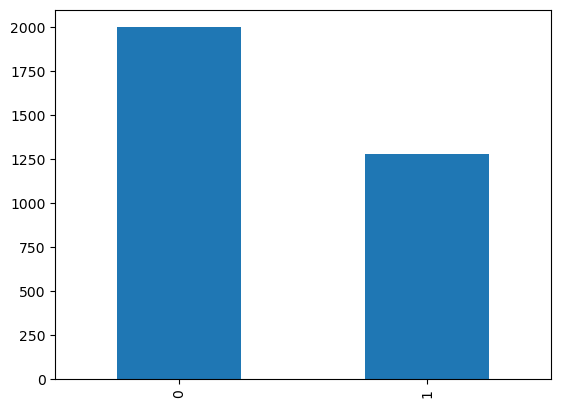

In [10]:
data.Potability.value_counts().plot.bar()

In [11]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [12]:
x = data['ph'].mean()
data['ph'].fillna(x,inplace = True)

In [13]:
x = data['Sulfate'].mean()
data['Sulfate'].fillna(x,inplace = True)

In [14]:
x = data['Trihalomethanes'].mean()
data['Trihalomethanes'].fillna(x,inplace = True)

In [15]:
# After setting null values to mean value
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [16]:
# calculate skewness for numerical for each numerical column 
skewness = data.select_dtypes(include=[np.number]).skew()
print("skewness:")
print(skewness)

skewness:
ph                 0.027796
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.041184
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.085161
Turbidity         -0.007817
Potability         0.450784
dtype: float64


In [17]:
#calculate kurtosis for each numerical column 
kurtosis = data.select_dtypes(include=[np.number]).skew()
print("kurtosis:")
print(kurtosis)

kurtosis:
ph                 0.027796
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.041184
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.085161
Turbidity         -0.007817
Potability         0.450784
dtype: float64


In [18]:
#FINDING OUTLIERS zscore METHOD 
from scipy.stats import zscore
column_to_convert = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity',
                     'Organic_carbon','Trihalomethanes','Turbidity','Potability']
for col in column_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')
z_scores = np.abs(zscore(data[column_to_convert]))
(z_scores)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.043133e-16,0.259195,0.139471,0.112415,9.613574e-01,1.708954,1.180651,1.306149,1.286298,0.799775
1,2.289339e+00,2.036414,0.385987,0.307694,3.145987e-15,2.062575,0.270597,0.638480,0.684218,0.799775
2,6.928678e-01,0.847665,0.240047,1.360594,3.145987e-15,0.094032,0.781117,0.001509,1.167365,0.799775
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,0.778830,1.255134,2.152874,0.848412,0.799775
4,1.368569e+00,0.464429,0.460249,0.363698,6.541765e-01,0.343939,0.824357,2.181599,0.138786,0.799775
...,...,...,...,...,...,...,...,...,...,...
3271,1.641587e+00,0.081758,2.916188,0.028027,7.242640e-01,1.240155,0.118075,0.018481,0.601124,1.250352
3272,4.953704e-01,0.085667,0.534295,0.593290,3.145987e-15,0.417706,1.698560,0.000000,1.497627,1.250352
3273,1.591254e+00,0.626829,1.270810,0.144017,3.145987e-15,0.072263,0.981329,0.218748,0.856007,1.250352
3274,1.329516e+00,1.041355,1.144058,0.517373,3.145987e-15,0.288597,0.942064,0.703468,0.950797,1.250352


In [19]:
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
print(f'Number of outliers: {outliers.sum()}')

Number of outliers: 148


In [20]:
data_no_outliers = data[~outliers]
print(f'Numbers of data points after removing: {len(data_no_outliers)}')

Numbers of data points after removing: 3128


In [21]:
data = data_no_outliers

In [22]:
# After removing outliers
data.shape

(3128, 10)

### Visualization

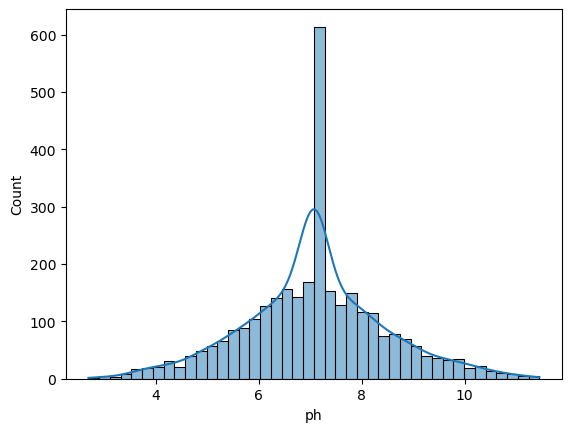

In [23]:
sns.histplot(data['ph'], kde = True)
plt.show()

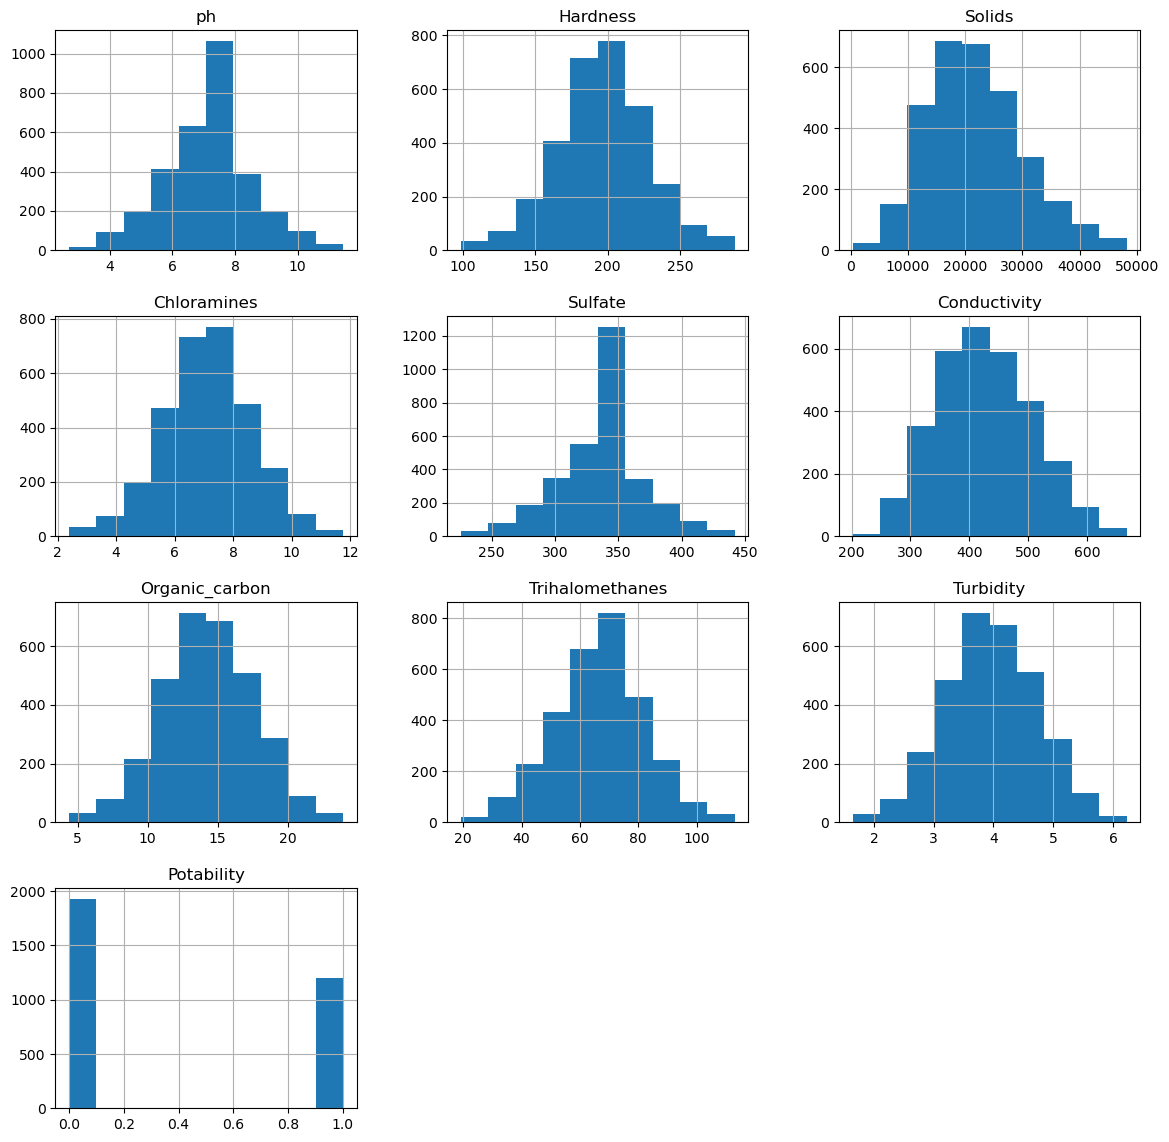

In [24]:
data.hist(figsize=(14,14))
plt.show()

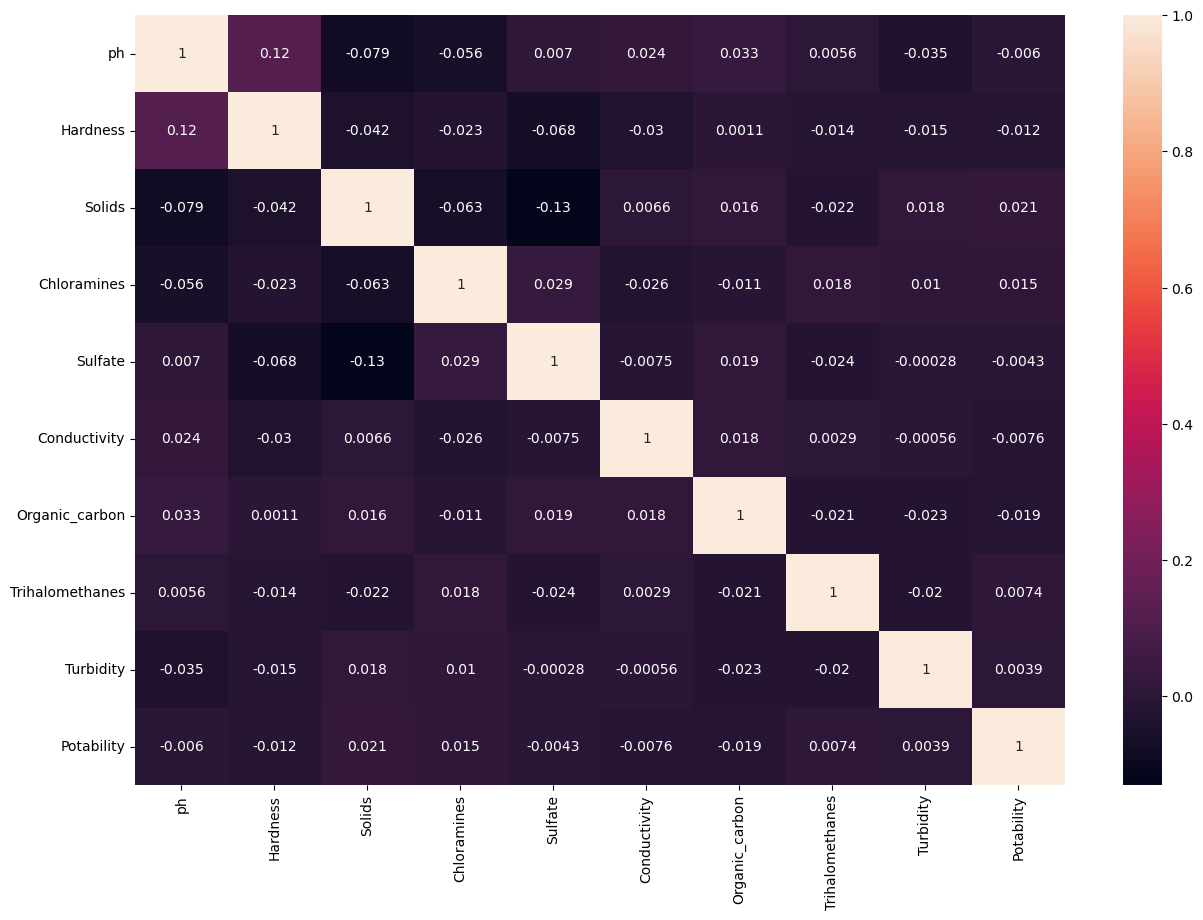

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(data.select_dtypes(include=['int64','float64']).corr(),annot=True)
plt.show()

### Feature Selection

In [26]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [27]:
from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target variable
X = data.drop('Potability', axis=1)
y = data['Potability']

# Apply SelectKBest to extract top k best features
k = 6  # Adjust k to select the number of top features you want
bestfeatures = SelectKBest(score_func=chi2, k=k)
fit = bestfeatures.fit(X, y)

# Get the selected feature names
selected_features = X.columns[fit.get_support()]

print("Selected features:", selected_features)
X_new = fit.transform(X)

# If you want to convert the transformed array back to a DataFrame
X_new_df = pd.DataFrame(X_new, columns=selected_features)

# Display the DataFrame with the selected features
print(X_new_df.head())

Selected features: Index(['Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon',
       'Trihalomethanes'],
      dtype='object')
     Hardness        Solids  Chloramines  Conductivity  Organic_carbon  \
0  204.890455  20791.318981     7.300212    564.308654       10.379783   
1  129.422921  18630.057858     6.635246    592.885359       15.180013   
2  224.236259  19909.541732     9.275884    418.606213       16.868637   
3  214.373394  22018.417441     8.059332    363.266516       18.436524   
4  181.101509  17978.986339     6.546600    398.410813       11.558279   

   Trihalomethanes  
0        86.990970  
1        56.329076  
2        66.420093  
3       100.341674  
4        31.997993  


### Split Dataset

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new_df, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2502, 6), (626, 6), (2502,), (626,))

### Decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5575079872204473
Precision: 0.4066390041493776
Recall: 0.4224137931034483
F1 Score: 0.4143763213530655


### Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

# Make predictions
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6293929712460063
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


###  Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions
y_pred = naive_bayes.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6246006389776357
Precision: 0.38461538461538464
Recall: 0.021551724137931036
F1 Score: 0.04081632653061225


### Gradient boost

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

# Make predictions
y_pred = gradient_boosting.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6134185303514377
Precision: 0.41935483870967744
Recall: 0.11206896551724138
F1 Score: 0.17687074829931973


### Adaboost

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the AdaBoost model
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

# Make predictions
y_pred = adaboost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6038338658146964
Precision: 0.3620689655172414
Recall: 0.09051724137931035
F1 Score: 0.14482758620689656
